# Recommender system for a medical supplies company

In [1]:
import pandas as pd
import numpy as np
import plotly as plt

In [2]:
import pandas as pd

dtypes = {
    0: 'object',
    4: 'object',
    # Specify the data types for the other columns
}

df= pd.read_csv('PBL.csv', encoding='iso-8859-1', dtype=dtypes)

C:\Users\w10\AppData\Local\Temp\ipykernel_2864\2541774782.py:9: DtypeWarning: Columns (20,33,73,106,158) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('PBL.csv', encoding='iso-8859-1', dtype=dtypes)


# EDA

In [3]:
df

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Plastic Rim,NaN,NaN,NaN,PF06157,3.0,NaN
4190,3732,Kennithe,Tecora,NaN,1463412756,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF08485,3.0,NaN
4191,3733,Tinna,Randall,NaN,1463413245,NaN,NaN,NaN,NaN,NaN,...,NaN,21AH Batteries,NaN,NaN,NaN,NaN,NaN,PM36,3.0,NaN
4192,3735,HALIMAH,SHAHID,NaN,1463416687,NaN,1.0,NaN,NaN,NaN,...,5.0,NaN,NaN,Aluminum,NaN,NaN,NaN,PF04829,3.0,NaN


In [4]:
df['Customers.company'].value_counts()

Customers.company
Company145    27
Company130    17
Company59     15
Company52     13
Company171    12
              ..
Company163     1
Company162     1
Company160     1
Company157     1
Company425     1
Name: count, Length: 425, dtype: int64

In [5]:
df=df.dropna(thresh=20) #sütunlarının 20 kadarı nansa direk o satırları kaldırdım.

In [6]:
df

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,Nora,Fontana,NaN,1463408698,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,Plastic Rim,NaN,NaN,NaN,PF06157,3.0,NaN
4190,3732,Kennithe,Tecora,NaN,1463412756,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF08485,3.0,NaN
4191,3733,Tinna,Randall,NaN,1463413245,NaN,NaN,NaN,NaN,NaN,...,NaN,21AH Batteries,NaN,NaN,NaN,NaN,NaN,PM36,3.0,NaN
4192,3735,HALIMAH,SHAHID,NaN,1463416687,NaN,1.0,NaN,NaN,NaN,...,5.0,NaN,NaN,Aluminum,NaN,NaN,NaN,PF04829,3.0,NaN


In [7]:
df['Customers.company'].value_counts()

Customers.company
Company145    27
Company130    17
Company59     15
Company52     13
Company171    12
              ..
Company163     1
Company162     1
Company160     1
Company157     1
Company425     1
Name: count, Length: 425, dtype: int64

In [8]:

# Kolonlardaki eksik değer oranını hesapla
missing_ratio = df.isnull().sum() / len(df)

In [9]:
# Yüzde 33'den fazla eksik değere sahip kolonları bul
drop_cols = missing_ratio[missing_ratio > 0.33].index


In [10]:
drop_cols = [col for col in drop_cols if col != 'Customers.company']

In [11]:
# Bulunan kolonları veri çerçevesinden kaldır
df = df.drop(drop_cols, axis=1)

In [12]:
df

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,...,Products.unit,Products.packaging,Products.multiple,Products.hcpcs,Products.override_markup,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
0,797,Christy,Dill,Company0,1426018724,1437764306,0.0,3758,797,Christy,...,EA,1 Each / Each,1 EA,E0149 +E0156,0.0,24.80,7.50,30.40,PF61071,0.0
1,3,John,Smith,Company1,1386089139,1437764354,0.0,23,3,John,...,EA,1 Each / Each,1 EA,A4357,0.0,8.00,7.00,1.50,PF02132,NaN
2,3,John,Smith,Company1,1386089139,1437764354,0.0,9531,3,John,...,CS,800 Each / Case,1 CS,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,0.0,13.23,10.04,10.24,PF00342,0.0
3,4,James,Anderson,NaN,1386780263,1437762646,0.0,29,4,James,...,EA,1 Each / Each,1 EA,A9270,0.0,10.60,7.80,18.50,PF04970,NaN
4,5,Abraham,Pollak,Company3,1386861599,1437764316,0.0,30,5,Abraham,...,EA,1 Each / Each,1 EA,E0730,0.0,8.50,2.75,12.00,PF03045,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,Nora,Fontana,NaN,1463408698,1463408698,0.0,17421,3730,Nora,...,PK,24 Each / Pack,1 PK,NO CODE - PRODUCT DOES NOT MEET HCPCS SPECIFIC...,1.0,5.00,5.00,7.00,PF06157,3.0
4190,3732,Kennithe,Tecora,NaN,1463412756,1463412756,NaN,17425,3732,Kennithe,...,EA,1 Each / Each,1 EA,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,0.0,14.60,4.10,18.00,PF08485,3.0
4191,3733,Tinna,Randall,NaN,1463413245,1463413245,NaN,17426,3733,Tinna,...,EA,NaN,NaN,K0800,0.0,45.00,20.75,20.75,PM36,3.0
4192,3735,HALIMAH,SHAHID,NaN,1463416687,1463416687,NaN,17431,3735,HALIMAH,...,EA,1 Each / Each,1 EA,E0149,0.0,25.25,8.60,23.20,PF04829,3.0


In [13]:
df['name'] =df['Customers.fname'].str.cat(df['Customers.lname'], sep=' ')

In [14]:
del df['Customers.fname'],df['Customers.lname']

In [15]:
pd.set_option("display.max_columns",76)
df.head()

,Customers.id,Customers.company,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.flags,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_asin,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.short_description,Products.long_description,Products.seo_title,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.multiple,Products.hcpcs,Products.override_markup,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status,name
0,797,Company0,1426018724,1437764306,0.0,3758,797,Christy,Dill,3758,USD,57.20,0.0,9.95,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,0.0,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,0.0,1.463163e+09,1.0,1.088440e+13,MEDLINE,MDS86850EGS,62.0,B00I6GQE0A,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,8000064C-1434298761,1.450325e+09,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,1 EA,E0149 +E0156,0.0,24.80,7.50,30.40,PF61071,0.0,Christy Dill
1,3,Company1,1386089139,1437764354,0.0,23,3,John,Smith,23,USD,20.00,NaN,9.99,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,0.0,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,65.0,1.462370e+09,1.0,1.008020e+13,MEDLINE,DYNC1674H,62.0,B000QF7Y76,health-care-products,NaN,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,80008C35-1438901283,1.450322e+09,"BAG,DRAINAGE,UROLOGY,2000ML,ANTI REFLUX",<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,1 EA,A4357,0.0,8.00,7.00,1.50,PF02132,NaN,John Smith
2,3,Company1,1386089139,1437764354,0.0,9531,3,John,Smith,9531,USD,68.78,0.0,9.95,78.73,manual,0|Standard Shipping,NaN,3.0,1.449604e+09,authorize.net,78.73,0,0,3,1449603652,1.450213e+09,NaN,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,52.50,32896.0,1.463163e+09,1.0,4.008020e+13,MEDLINE,484805,62.0,B002209AOI,health-care-products,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,800087BB-1438898332,1.450321e+09,"GLOVE,EXAM,NITRILE,BLUE,FINGRTIP,TXT,XXL",<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitril

In [16]:
df['Products.vendor'].value_counts()

Products.vendor
1.0     2981
2.0      616
5.0      385
7.0       31
11.0      16
4.0        5
9.0        2
10.0       1
Name: count, dtype: int64

In [17]:
df['Orders.shipping_carrier'].value_counts()

Orders.shipping_carrier
fedex     2304
manual    1203
ups         57
NSVA         5
WTVA         2
NDSN         1
INTF         1
MT03         1
HWEP         1
FEDX         1
RDWY         1
Name: count, dtype: int64

In [18]:
df

,Customers.id,Customers.company,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.flags,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_asin,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.short_description,Products.long_description,Products.seo_title,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.multiple,Products.hcpcs,Products.override_markup,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status,name
0,797,Company0,1426018724,1437764306,0.0,3758,797,Christy,Dill,3758,USD,57.20,0.00,9.95,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,0.0,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,0.0,1.463163e+09,1.0,1.088440e+13,MEDLINE,MDS86850EGS,62.0,B00I6GQE0A,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,8000064C-1434298761,1.450325e+09,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,1 EA,E0149 +E0156,0.0,24.80,7.50,30.40,PF61071,0.0,Christy Dill
1,3,Company1,1386089139,1437764354,0.0,23,3,John,Smith,23,USD,20.00,NaN,9.99,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,0.0,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,65.0,1.462370e+09,1.0,1.008020e+13,MEDLINE,DYNC1674H,62.0,B000QF7Y76,health-care-products,NaN,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,80008C35-1438901283,1.450322e+09,"BAG,DRAINAGE,UROLOGY,2000ML,ANTI REFLUX",<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,1 EA,A4357,0.0,8.00,7.00,1.50,PF02132,NaN,John Smith
2,3,Company1,1386089139,1437764354,0.0,9531,3,John,Smith,9531,USD,68.78,0.00,9.95,78.73,manual,0|Standard Shipping,NaN,3.0,1.449604e+09,authorize.net,78.73,0,0,3,1449603652,1.450213e+09,NaN,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,52.50,32896.0,1.463163e+09,1.0,4.008020e+13,MEDLINE,484805,62.0,B002209AOI,health-care-products,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,800087BB-1438898332,1.450321e+09,"GLOVE,EXAM,NITRILE,BLUE,FINGRTIP,TXT,XXL",<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",SensiCare-Nitr

In [19]:
# Get the list of column names
cols = df.columns.tolist()

# Move the last column to the second position
cols = [cols[0]] + [cols[-1]] + cols[1:-1]

# Reindex the DataFrame
df = df[cols]

In [20]:
df


,Customers.id,name,Customers.company,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.flags,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_asin,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.short_description,Products.long_description,Products.seo_title,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.multiple,Products.hcpcs,Products.override_markup,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
0,797,Christy Dill,Company0,1426018724,1437764306,0.0,3758,797,Christy,Dill,3758,USD,57.20,0.00,9.95,64.29,fedex,11|Ground,5.7204E+14,3.0,1.426019e+09,authorize.net,64.29,6993607863,510142,1,1426019099,1.438868e+09,1.426101e+09,0.0,5284,3758,2310.0,"Basic Rollators, Green",1,57.20,44.00,2310.0,0.0,sub-product-detail.html,1.0,3.0,"Basic Steel Rollators,Green","Basic Lightweight Rollators For Adults, With S...",80.70,57.64,44.00,0.0,1.463163e+09,1.0,1.088440e+13,MEDLINE,MDS86850EGS,62.0,B00I6GQE0A,health-care-products,generic/online%3Aen%3AUS%3A2310,"Walking Aids > Rollators, & Walkers > Rollators",Health & Beauty > Health Care,8000064C-1434298761,1.450325e+09,"ROLLATOR,BASIC,STEEL,6"",GREEN","<ul><li> Classically designed, value priced</...","Basic Lightweight Rollators For Adults, With S...",Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,1 EA,E0149 +E0156,0.0,24.80,7.50,30.40,PF61071,0.0
1,3,John Smith,Company1,1386089139,1437764354,0.0,23,3,John,Smith,23,USD,20.00,NaN,9.99,29.99,fedex,11|Ground,1.28597E+14,3.0,1.386090e+09,authorize.net,29.99,0,0,1,1386090455,1.440529e+09,1.386103e+09,0.0,31,23,177.0,"Urinary Drain Bags,0.000",4,5.00,1.87,177.0,1.0,sub-product-detail.html,1.0,3.0,Urinary Drain Bags,Urinary Drain Bags,14.41,10.29,1.87,65.0,1.462370e+09,1.0,1.008020e+13,MEDLINE,DYNC1674H,62.0,B000QF7Y76,health-care-products,NaN,"Incontinence, Urology & Ostomy > Urology > Dra...",Health & Beauty > Health Care,80008C35-1438901283,1.450322e+09,"BAG,DRAINAGE,UROLOGY,2000ML,ANTI REFLUX",<ul><li> Only Medline drain bags have a slide...,Urinary Drain Bags | MEDLINE - DYNC1674H,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,1 EA,A4357,0.0,8.00,7.00,1.50,PF02132,NaN
2,3,John Smith,Company1,1386089139,1437764354,0.0,9531,3,John,Smith,9531,USD,68.78,0.00,9.95,78.73,manual,0|Standard Shipping,NaN,3.0,1.449604e+09,authorize.net,78.73,0,0,3,1449603652,1.450213e+09,NaN,0.0,11655,9531,1.0,"SensiCare Nitrile Exam Gloves, Blue, XX-Large",1,68.78,52.50,1.0,0.0,sub-product-detail.html,1.0,3.0,"SensiCare Nitrile Exam Gloves,Blue,XX-Large","SensiCare Nitrile Exam Gloves, Blue, XX-Large",96.29,68.78,52.50,32896.0,1.463163e+09,1.0,4.008020e+13,MEDLINE,484805,62.0,B002209AOI,health-care-products,generic/online%3Aen%3AUS%3A1,Apparel > Gloves > Nonsterile PF LF Synthetic ...,Health & Beauty > Health Care,800087BB-1438898332,1.450321e+09,"GLOVE,EXAM,NITRILE,BLUE,FINGRTIP,TXT,XXL",<ul><li> SensiCare&reg; nitrile exam gloves fe...,"Nitrile Exam Gloves, Blue, XX-Large | MEDLINE ...",Sen

In [21]:
df = df[['Customers.id', 'name','Customers.company','Customers.last_modified', 'Orders.id', 'Orders.total', 'Orders.payment_date', 'Order_Items.qty', 'Products.name', 'Products.price','Products.multiple','Orders.shipping_carrier']]

In [22]:
df

,Customers.id,name,Customers.company,Customers.last_modified,Orders.id,Orders.total,Orders.payment_date,Order_Items.qty,Products.name,Products.price,Products.multiple,Orders.shipping_carrier
0,797,Christy Dill,Company0,1437764306,3758,64.29,1.426019e+09,1,"Basic Steel Rollators,Green",57.64,1 EA,fedex
1,3,John Smith,Company1,1437764354,23,29.99,1.386090e+09,4,Urinary Drain Bags,10.29,1 EA,fedex
2,3,John Smith,Company1,1437764354,9531,78.73,1.449604e+09,1,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",68.78,1 CS,manual
3,4,James Anderson,NaN,1437762646,29,29.55,1.386780e+09,1,Basket for 2-Button Walkers,19.56,1 EA,NaN
4,5,Abraham Pollak,Company3,1437764316,30,46.00,1.386862e+09,1,TENS 3000 Analog Unit,36.05,1 EA,fedex
...,...,...,...,...,...,...,...,...,...,...,...,...
4189,3730,Nora Fontana,NaN,1463408698,17421,16.06,1.463409e+09,1,"Emesis Bags,Blue,36.000 OZ",23.65,1 PK,NaN
4190,3732,Kennithe Tecora,NaN,1463412756,17425,39.99,1.463413e+09,1,Bed Assist Bar,69.99,1 EA,NaN
4191,3733,Tinna Randall,NaN,1463413245,17426,989.10,1.463413e+09,1,Spitfire EX Compact Travel Power Mobility Scoo...,1099.00,NaN,NaN
4192,3735,HALIMAH SHAHID,NaN,1463416687,17431,129.99,1.463417e+09,1,"Standard Bariatric Heavy Duty Rollator,Burgund...",129.99,1 EA,NaN


## Most Popular Product by Volume and Dollar Amount

In [23]:
df['Products.name'].value_counts() #most_popular_by_volume

Products.name
Emesis Bags,Blue,36.000 OZ                                                                                            103
MoliCare Disposable Super Plus Briefs,27"-47"                                                                          71
Aluminum Transport Chair with 12" Wheels,Red,F: 8   R: 12                                                              67
Aluminum Transport Chair with 12" Wheels,Blue,F: 8   R: 12                                                             67
K1 Basic Extra-Wide Wheelchairs                                                                                        54
                                                                                                                     ... 
CanDo&reg; Digi-Flex&reg; hand exerciser - Yellow, x-light - Finger (1.5 lb) / hand (5.0 lb)                            1
CanDo&reg; Digi-Squeeze&reg; hand exerciser - Small - set of 5 pieces (yellow, red, green, blue, black), with rack      1
Waterproof

In [24]:
most_popular_by_dollar = max(df["Products.price"])
most_popular_by_dollar 

1899.0

In [25]:
most_popular_by_dollar 

1899.0

## Company with a maximum purchase

In [26]:
maximum_purchase=df.groupby("Customers.company")["Orders.total"].max()

In [27]:
print(maximum_purchase.max())

4575.0


In [28]:
maximum_purchase.sort_values(ascending=False)

Customers.company
Company343    4575.00
Company207    2375.59
Company17     2300.00
Company281    1740.00
Company130    1048.91
               ...   
Company155      13.59
Company424      11.56
Company369      10.56
Company392       8.91
Company375       6.98
Name: Orders.total, Length: 425, dtype: float64

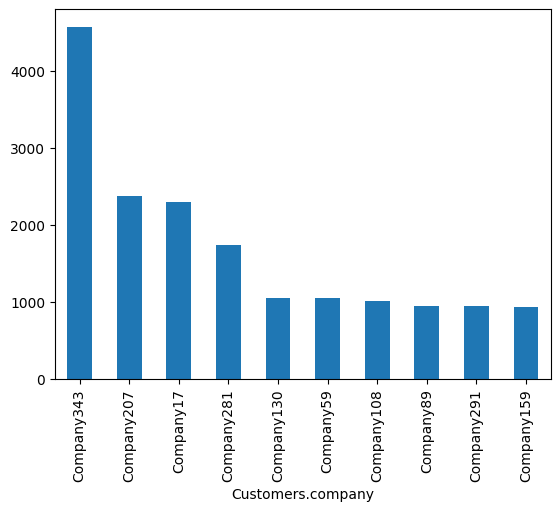

In [29]:
top10=maximum_purchase.sort_values(ascending=False).head(10)
top10.plot(kind='bar');

## Popularity-based recommender

In [30]:
df["Products.price"].fillna(df["Products.price"].mean(),inplace=True)

C:\Users\w10\AppData\Local\Temp\ipykernel_2864\3838899011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Products.price"].fillna(df["Products.price"].mean(),inplace=True)


In [31]:
df["Products.price"].isnull().sum()

0

In [32]:
products_grouped=df.groupby("Products.name").agg({"Products.price":[np.size,np.sum,np.mean]})

C:\Users\w10\AppData\Local\Temp\ipykernel_2864\2478182253.py:1: FutureWarning: The provided callable <function sum at 0x000001AD42361F80> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  products_grouped=df.groupby("Products.name").agg({"Products.price":[np.size,np.sum,np.mean]})
C:\Users\w10\AppData\Local\Temp\ipykernel_2864\2478182253.py:1: FutureWarning: The provided callable <function mean at 0x000001AD42363060> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  products_grouped=df.groupby("Products.name").agg({"Products.price":[np.size,np.sum,np.mean]})


In [33]:
products_grouped.head()

Products.price          \
                                                             size     sum   
Products.name                                                               
1 Box Of Medline Commode Liners with Absorbent Pad              1   26.33   
1-Ply Blockade AngelStat Surgical Gowns,Ceil Bl...              1  235.05   
1/2" self-adhesive hook material, 25 yard dispe...              1   23.25   
1/2" self-adhesive loop material, 25 yard dispe...              1   23.25   
100% Cotton Unisex Reversible Hyperbaric Scrub ...              2   36.54   

                                                            
                                                      mean  
Products.name                                               
1 Box Of Medline Commode Liners with Absorbent Pad   26.33  
1-Ply Blockade AngelStat Surgical Gowns,Ceil Bl...  235.05  
1/2" self-adhesive hook material, 25 yard dispe...   23.25  
1/2" self-adhesive loop material, 25 yard dispe...   23.25  
100% Cotton Unisex Reversible Hyperbaric Scrub ...   18.27

In [34]:
popular_products=products_grouped.sort_values(("Products.price","mean"),ascending=False)

In [35]:
popular_products.head()

Products.price          \
                                                             size     sum   
Products.name                                                               
Cirrus Plus EC Folding Power Wheelchair                         1  1899.0   
Battery Powered Electric Patient Lift with Rech...              1  1899.0   
Titan Transportable Front Wheel Power Wheelchair                1  1475.0   
Phoenix Heavy Duty Power Scooter, 4 Wheel                       1  1199.0   
Phoenix Heavy Duty Power Scooter, 3 Wheel                       1  1149.0   

                                                            
                                                      mean  
Products.name                                               
Cirrus Plus EC Folding Power Wheelchair             1899.0  
Battery Powered Electric Patient Lift with Rech...  1899.0  
Titan Transportable Front Wheel Power Wheelchair    1475.0  
Phoenix Heavy Duty Power Scooter, 4 Wheel           1199.0  
Phoenix Heavy Duty Power Scooter, 3 Wheel           1149.0

In [36]:
grouped_sum=products_grouped["Products.price"]["sum"].sum()

In [37]:
popular_products["percentage"]=popular_products["Products.price"]["sum"].div(grouped_sum)*100

In [38]:
popular_products.head()

Products.price          \
                                                             size     sum   
Products.name                                                               
Cirrus Plus EC Folding Power Wheelchair                         1  1899.0   
Battery Powered Electric Patient Lift with Rech...              1  1899.0   
Titan Transportable Front Wheel Power Wheelchair                1  1475.0   
Phoenix Heavy Duty Power Scooter, 4 Wheel                       1  1199.0   
Phoenix Heavy Duty Power Scooter, 3 Wheel                       1  1149.0   

                                                           percentage  
                                                      mean             
Products.name                                                          
Cirrus Plus EC Folding Power Wheelchair             1899.0   0.633397  
Battery Powered Electric Patient Lift with Rech...  1899.0   0.633397  
Titan Transportable Front Wheel Power Wheelchair    1475.0   0.491975  
Phoenix Heavy Duty Power Scooter, 4 Wheel           1199.0   0.399917  
Phoenix Heavy Duty Power Scooter, 3 Wheel           1149.0   0.383240

In [39]:
popular_products=popular_products.sort_values("percentage",ascending=False)

In [40]:
popular_products

Products.price            \
                                                             size       sum   
Products.name                                                                 
Aluminum Transport Chair with 12" Wheels,Red,F:...             67  13399.33   
Aluminum Transport Chair with 12" Wheels,Blue,F...             67  13399.33   
K1 Basic Extra-Wide Wheelchairs                                54  10180.60   
K1 Basic Wheelchairs                                           40   5883.61   
Silent Knight Pill Crushers                                    53   5087.47   
...                                                           ...       ...   
Double-Sided Sterile Shave Prep Razor                           1      3.47   
DawnMist Gel Toothpaste,0.850 OZ                                1      3.08   
Sterile Eye Pads                                                1      2.37   
Perineal Irrigation Bottle,8.000 OZ                             1      2.31   
Paper Measuring Tapes,72.00 IN                                  1      1.54   

                                                              percentage  
                                                         mean             
Products.name                                                             
Aluminum Transport Chair with 12" Wheels,Red,F:...  199.99000   4.469244  
Aluminum Transport Chair with 12" Wheels,Blue,F...  199.99000   4.469244  
K1 Basic Extra-Wide Wheelchairs                     188.52963   3.395661  
K1 Basic Wheelchairs                                147.09025   1.962433  
Silent Knight Pill Crushers                          95.99000   1.696887  
...                                                       ...        ...  
Double-Sided Sterile Shave Prep Razor                 3.47000   0.001157  
DawnMist Gel Toothpaste,0.850 OZ                      3.08000   0.001027  
Sterile Eye Pads                                      2.37000   0.000790  
Perineal Irrigation Bottle,8.000 OZ                   2.31000   0.000770  
Paper Measuring Tapes,72.00 IN                        1.54000   0.000514  

[1391 rows x 4 columns]

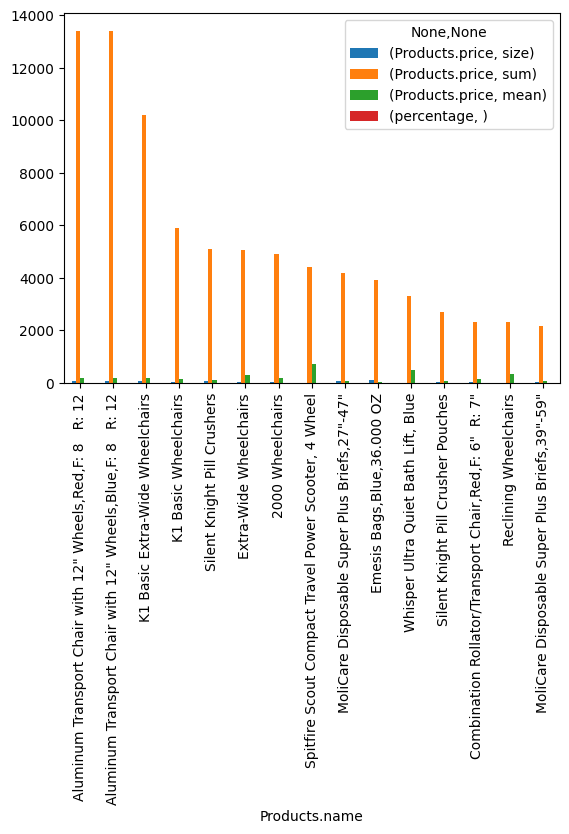

In [41]:
top15=popular_products.head(15)
top15.plot(kind='bar');

## Recommender system using matrix factorization

In [42]:
df.head()

,Customers.id,name,Customers.company,Customers.last_modified,Orders.id,Orders.total,Orders.payment_date,Order_Items.qty,Products.name,Products.price,Products.multiple,Orders.shipping_carrier
0,797,Christy Dill,Company0,1437764306,3758,64.29,1.426019e+09,1,"Basic Steel Rollators,Green",57.64,1 EA,fedex
1,3,John Smith,Company1,1437764354,23,29.99,1.386090e+09,4,Urinary Drain Bags,10.29,1 EA,fedex
2,3,John Smith,Company1,1437764354,9531,78.73,1.449604e+09,1,"SensiCare Nitrile Exam Gloves,Blue,XX-Large",68.78,1 CS,manual
3,4,James Anderson,NaN,1437762646,29,29.55,1.386780e+09,1,Basket for 2-Button Walkers,19.56,1 EA,NaN
4,5,Abraham Pollak,Company3,1437764316,30,46.00,1.386862e+09,1,TENS 3000 Analog Unit,36.05,1 EA,fedex


In [43]:
products_costings=df.pivot_table(index=['Customers.id'],columns=['Products.name'],values='Products.price')

In [44]:
products_costings.head()

Products.name,1 Box Of Medline Commode Liners with Absorbent Pad,"1-Ply Blockade AngelStat Surgical Gowns,Ceil Blue,Extra Large","1/2"" self-adhesive hook material, 25 yard dispenser box, white","1/2"" self-adhesive loop material, 25 yard dispenser box, white","100% Cotton Unisex Reversible Hyperbaric Scrub Tops,Misty Green,MZS","100% Cotton Unisex Reversible Tops,Ceil Blue,MHS","18"" Hamper Stands,Standard","2"" self-adhesive loop material, 10 yard dispenser box, tan","2"" self-adhesive loop material, 25 yard dispenser box, tan","2-Ply Tissue/Poly Professional Towels,Not Applicable",2000 Wheelchairs,"24 Hour Urine Collection Bottle,3000.0 ML","3 Pack, Hospital Receiving Blankets, Baby Blankets, 100% Cotton, 30x40, Elephant","3 Pack, Hospital Receiving Blankets, Baby Blankets, 100% Cotton, 34x40, Footprints",3 Wheel Walker Rollator with Basket Tray and Pouch,"3"" Wheels For Walkers","3/4"" Guardian Utility Tips,Gray","5"" Wheels For Walkers",6 Cylinder Oxygen Carrier,6-spring hand grip (each),"8"" Rear Walker Wheel Attachment","A&D Ointment by H & H Laboratories Inc,384.00 ML",Accu-Therm Hot/Cold Gel Packs,Accu-Therm Insulated Hot Pack,Accu-Therm Non-Insulated Hot Pack,"Accutouch Chemo Nitrile Exam Gloves,Blue,Medium","Active Liquid Protein Nutritional Supplement,30.000 OZ",AcuForce&reg; 7.0 Massage Tool,"Addipak Sterile Saline Solution,3.00 ML",Adjustable Angle Rotating Suction Cup Grab Bar,Adjustable Height Bathtub Grab Bar Safety Rail,Adjustable Height Home Bed Assist Handle,"Adjustable Height Rollator with 6"" Wheels",Adjustable Height Teak Bath Bench Stool,Adjustable Lightweight Folding Cane with Gel Hand Grip,Adult Bariatric Crutches,"AdvanTrode&reg; Elite Electrode, 2"" round, tan tricot, 40/box","Advantage Magnetic Patient Alarms,Yellow",...,Walking Crutches with Underarm Pad and Handgrip,"Wall mat hanger, 86"" L x 8"" H x 16"" D, 10 capacity",Wallaby Headrest Extension,Wallaby Pediatric Folding Wheelchair,"Washable Cotton Material Gait Belts,Black","Washable Cotton Material Gait Belts,Red, White & Blue Stripes","Washable Cotton Material Gait Belts,Yellow","Water Soluble Bags,Clear",Waterproof Cast Protector,WaxWel&reg; Paraffin Bath - Accessory Package - 6 Terry Hand Mitts ONLY,Wedge Cushion with Stretch Cover,Wheelchair Anti-Fold/Anti-Theft Devices,Wheelchair Carry Pouch for Oxygen Cylinders,Wheelchair Drainage Bag Holders,Wheelchair Elevating Legrest Assembly Part,Wheelchair IV Pole Attachments,"Wheelchair Oxygen Tank Holder by Maddak,Black",Wheelchair Rear Anti-Tip Devices,Wheelchair Seat Belt,"Wheelchair tray with rim and straps, 24"" x 20"", wood finish","Wheelchair tray, economy, 24"" x 20"", wood finish","Whisper Ultra Quiet Bath Lift, Blue",Winnie Deluxe 3 Wheel Rollator Walker,Winnie Lite Supreme 3 Wheel Walker Rollator,Winnie Wagon All Purpose Shopping Utility Cart,"Wooden Applicator Sticks,6.00 IN",Wound Measuring Bullseye,Woven Sterile Gauze Sponges,"Wrist and Forearm Splint with Abducted Thumb,Large","Wrist and Forearm Splint with Abducted Thumb,Medium","Wrist and Forearm Splint with Abducted Thumb,Small","Wrist and Forearm Splints,Medium","Youth Two-Button Folding Walkers with 5"" Wheels,5""",Youth-Sized Walker Platform Attachment,"Zip-Style Biohazard Specimen Bags,Clear",iWalker Euro Style Rollator,"sEMG - MyoTrac Home Trainer with Myoscan Active Sensor and extender cable, 1-channel","sEMG - single use uni-gel electrodes only, case of 100"
Customers.id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN

In [45]:
costings1=products_costings["Toilet Safety Rails"]

In [46]:
similar_products=products_costings.corrwith(costings1)

C:\Users\w10\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\w10\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\w10\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [47]:
similar_products.max()

1.0

In [48]:
similar_products=similar_products.dropna()

In [49]:
similar_products=similar_products.sort_values(ascending=False)

In [50]:
similar_products

Products.name
Toilet Safety Rails    1.0
dtype: float64

In [52]:

products_stats=df.groupby('Products.name').agg({"Products.price":[np.size,np.mean]})

C:\Users\w10\AppData\Local\Temp\ipykernel_2864\3167488191.py:1: FutureWarning: The provided callable <function mean at 0x000001AD42363060> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  products_stats=df.groupby('Products.name').agg({"Products.price":[np.size,np.mean]})


In [53]:
products_stats

Products.price        
                                                             size    mean
Products.name                                                            
1 Box Of Medline Commode Liners with Absorbent Pad              1   26.33
1-Ply Blockade AngelStat Surgical Gowns,Ceil Bl...              1  235.05
1/2" self-adhesive hook material, 25 yard dispe...              1   23.25
1/2" self-adhesive loop material, 25 yard dispe...              1   23.25
100% Cotton Unisex Reversible Hyperbaric Scrub ...              2   18.27
...                                                           ...     ...
Youth-Sized Walker Platform Attachment                          1   51.71
Zip-Style Biohazard Specimen Bags,Clear                         1   48.41
iWalker Euro Style Rollator                                     1  172.71
sEMG - MyoTrac Home Trainer with Myoscan Active...              1  481.25
sEMG - single use uni-gel electrodes only, case...              1   39.20

[1391 rows x 2 columns]

In [54]:
products_stats["Products.price"]["size"].mean()

2.9022286125089862

In [56]:
popular_products_2=products_stats[products_stats["Products.price"]["size"]>4.5]

In [57]:
popular_products_2

Products.price         
                                                             size     mean
Products.name                                                             
18" Hamper Stands,Standard                                      6   83.360
2000 Wheelchairs                                               25  196.040
3 Wheel Walker Rollator with Basket Tray and Pouch              6   88.670
Adjustable Height Home Bed Assist Handle                        6   49.190
Adjustable Height Teak Bath Bench Stool                         6   59.050
...                                                           ...      ...
Walker Platform Attachment                                      5   46.930
Walker Rollator with 6" Wheels, Fold Up Removab...             20   77.990
Wheelchair Rear Anti-Tip Devices                                8   26.210
Whisper Ultra Quiet Bath Lift, Blue                             7  473.750
Woven Sterile Gauze Sponges                                    10   38.991

[189 rows x 2 columns]

In [58]:
popular_products_2.sort_values(("Products.price","mean"),ascending=False)

Products.price            
                                                             size        mean
Products.name                                                                
Spitfire Scout Compact Travel Power Scooter, 4 ...              6  736.250000
Whisper Ultra Quiet Bath Lift, Blue                             7  473.750000
Silver Sport Reclining Wheelchair with Elevatin...              5  346.250000
Reclining Wheelchairs                                           7  328.832857
Extra-Wide Wheelchairs                                         18  281.527222
...                                                           ...         ...
Hydrocerin Cream,16.00 OZ                                      14   12.460000
Supreme Urinals,Clear,32                                       12   10.630833
Insulated Carafes,Clear W/Blue Lid,32.000 OZ                    5   10.510000
CURAD Mediplast Wart Pads                                       5    6.710000
Sterile and Non-Sterile Pediatric Urine Collect...              7    4.350000

[189 rows x 2 columns]

In [59]:
similar_products_df = pd.DataFrame(similar_products, columns=['similarity'])

In [60]:
popular_products_2.columns=popular_products_2.columns.get_level_values(0)

df2=popular_products_2.join(similar_products_df)

In [61]:
df2.sort_values("similarity", ascending=False)
df2.head()

,Products.price,Products.price,similarity
Products.name,,,
"18"" Hamper Stands,Standard",6,83.36,NaN
2000 Wheelchairs,25,196.04,NaN
3 Wheel Walker Rollator with Basket Tray and Pouch,6,88.67,NaN
Adjustable Height Home Bed Assist Handle,6,49.19,NaN
Adjustable Height Teak Bath Bench Stool,6,59.05,NaN


## Cosine similarity for product description

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

cv=CountVectorizer()

In [63]:
sparse_matrix=cv.fit_transform(df)

# Convert the sparse matrix to a dense matrix
doc_term_matrix = sparse_matrix.todense()

# Create a DataFrame with the dense matrix and column names
df = pd.DataFrame(doc_term_matrix, columns=cv.get_feature_names_out())

df

,company,customers,id,last_modified,multiple,name,order_items,orders,payment_date,price,products,qty,shipping_carrier,total
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,1
6,0,0,0,0,0,0,0,1,1,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,1,1,0,0,0


In [64]:
cosine_similarity(df,df)

array([[1.        , 0.        , 0.5       , 0.5       , 0.5       ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.70710678, 0.        ,
        0.        , 0.        ],
       [0.5       , 0.        , 1.        , 0.5       , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.5       , 0.        , 0.5       , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.5       , 0.        , 0.        , 0.        , 1.        ,
        0.5       , 0.5       , 0.        , 0.        , 0.        ,
        0.        , 0.5       ],
       [0.        , 0.        , 0.        , 0.        , 0.5       ,
        1.        , 0.5       , 0.        , 0.        , 0.        ,
        0.        ,